In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

%matplotlib inline

In [ ]:
coronovirus_data = pd.read_csv("data/owid-covid-data.csv")

coronovirus_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


Посмотрим сколько данных в нашем датасете

In [ ]:
coronovirus_data_shape = coronovirus_data.shape
coronovirus_data_shape

(79277, 59)

Посмотрим какие столбцы в данных вообще есть  
Описание каждого столбца тут https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv

In [ ]:
coronovirus_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

Количество null значений в каждом столбце в процентном соотношении от общего числа строк

In [ ]:
coronovirus_data.isnull().sum() / coronovirus_data_shape[0] * 100

iso_code                                  0.000000
continent                                 4.879095
location                                  0.000000
date                                      0.000000
total_cases                               1.990489
new_cases                                 1.993012
new_cases_smoothed                        3.255673
total_deaths                             13.884229
new_deaths                               13.684928
new_deaths_smoothed                       3.255673
total_cases_per_million                   2.522800
new_cases_per_million                     2.525323
new_cases_smoothed_per_million            3.781677
total_deaths_per_million                 14.400141
new_deaths_per_million                   14.200840
new_deaths_smoothed_per_million           3.781677
reproduction_rate                        19.464662
icu_patients                             89.526597
icu_patients_per_million                 89.526597
hosp_patients                  

In [ ]:
null_table = coronovirus_data[coronovirus_data.continent.isnull()]
null_table

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
405,OWID_AFR,NaN,Africa,2020-02-13,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,OWID_AFR,NaN,Africa,2020-02-14,1.0,1.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407,OWID_AFR,NaN,Africa,2020-02-15,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
408,OWID_AFR,NaN,Africa,2020-02-16,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409,OWID_AFR,NaN,Africa,2020-02-17,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78151,OWID_WRL,NaN,World,2021-03-30,128212983.0,568122.0,572512.000,2803397.0,11561.0,9872.286,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
78152,OWID_WRL,NaN,World,2021-03-31,128896025.0,683042.0,579538.143,2815659.0,12262.0,10243.286,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
78153,OWID_WRL,NaN,World,2021-04-01,129607651.0,711626.0,588170.000,2827520.0,11861.0,10296.714,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
78154,OWID_WRL,NaN,World,2021-04-02,130236504.0,628853.0,586405.429,2837709.0,10189.0,10011.143,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737


In [ ]:
null_table.location.unique()

array(['Africa', 'Asia', 'Europe', 'European Union', 'International',
       'North America', 'Oceania', 'South America', 'World'], dtype=object)

Сначала посчитаем общемировую зависимость количества твиттов от количество заболевших (всего в мире)  
Для этого выберем из наших данных такие строки, где location = World

In [ ]:
world_stats = coronovirus_data[coronovirus_data.location == 'World']
world_stats.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
77718,OWID_WRL,NaN,World,2020-01-22,557.0,0.0,NaN,17.0,0.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
77719,OWID_WRL,NaN,World,2020-01-23,655.0,98.0,NaN,18.0,1.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
77720,OWID_WRL,NaN,World,2020-01-24,941.0,286.0,NaN,26.0,8.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
77721,OWID_WRL,NaN,World,2020-01-25,1433.0,492.0,NaN,42.0,16.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
77722,OWID_WRL,NaN,World,2020-01-26,2118.0,685.0,NaN,56.0,14.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737


Теперь возьмём данные от твиттах

In [ ]:
twitter_data = pd.read_csv("data/Corona_NLP_train.csv", encoding = "ISO-8859-1")
twitter_data.rename(columns={twitter_data.columns[3]: "date"}, inplace = True)
twitter_data.head(5)

,UserName,ScreenName,Location,date,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


Теперь подсчитаем количество твиттов каждый день

In [ ]:
twitts = dict()
dates = list(twitter_data.date)

for date in dates:
    if twitts.get(date) is None:
        twitts[date] = 1
    else:
        twitts[date] += 1

Теперь по подсчитанным данным созданим новый датафрейм

In [ ]:
count_of_twitts_per_day = pd.DataFrame()
count_of_twitts_per_day['date'] = twitts.keys()
count_of_twitts_per_day['count'] = twitts.values()
count_of_twitts_per_day.head()

,date,count
0,16-03-2020,656
1,17-03-2020,1977
2,18-03-2020,2742
3,19-03-2020,3215
4,20-03-2020,3448


Как мы видим даты в наших датасетах названы по разному, поэтому приведем их к общему виду

In [ ]:
dates = list(coronovirus_data.date)
new_dates = []
for date in dates:
    l = date.split("-")
    l.reverse()
    new_dates.append("-".join(l))

coronovirus_data.drop(['date'], axis=1)
coronovirus_data['date'] = new_dates

world_stats = coronovirus_data[coronovirus_data.location == 'World']

Теперь как мы видим даты у нас схожие

In [ ]:
world_stats.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
77718,OWID_WRL,NaN,World,22-01-2020,557.0,0.0,NaN,17.0,0.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
77719,OWID_WRL,NaN,World,23-01-2020,655.0,98.0,NaN,18.0,1.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
77720,OWID_WRL,NaN,World,24-01-2020,941.0,286.0,NaN,26.0,8.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
77721,OWID_WRL,NaN,World,25-01-2020,1433.0,492.0,NaN,42.0,16.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
77722,OWID_WRL,NaN,World,26-01-2020,2118.0,685.0,NaN,56.0,14.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737


Далее сделаем join наших таблиц

In [ ]:
df = world_stats.merge(count_of_twitts_per_day, on='date', how='inner')
df.head(5)
df.shape[0]

30

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,count
0,OWID_WRL,NaN,World,16-03-2020,184027.0,14808.0,9972.571,7153.0,683.0,451.429,...,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,656
1,OWID_WRL,NaN,World,17-03-2020,199970.0,15943.0,11561.286,7966.0,813.0,528.429,...,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,1977
2,OWID_WRL,NaN,World,18-03-2020,219535.0,19565.0,13261.857,8872.0,906.0,608.714,...,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,2742
3,OWID_WRL,NaN,World,19-03-2020,246584.0,27049.0,16298.857,9983.0,1111.0,723.714,...,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,3215
4,OWID_WRL,NaN,World,20-03-2020,277359.0,30775.0,18640.429,11469.0,1486.0,865.000,...,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,3448


<AxesSubplot:>

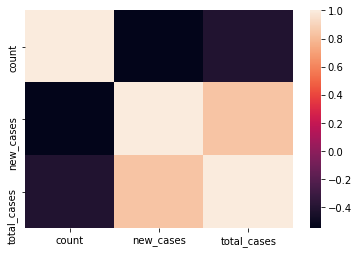

In [ ]:
corr_data = df[['count', 'new_cases', 'total_cases']]
corr = corr_data.corr()
sns.heatmap(corr)

In [ ]:
corr

,count,new_cases,total_cases
count,1.000000,-0.547724,-0.410476
new_cases,-0.547724,1.000000,0.840820
total_cases,-0.410476,0.840820,1.000000


Как мы видим коррелляции между количеством твиттев в день и количеством новых случаев не наблюдается  
Но корреляция между количеством новых случаев и общим числом случаев велика (что не удивительно)

Так же интересно посмотреть динамику новых случаев
Здесь мы можем наблюдать так называемые "волны" распространения короновируса

<AxesSubplot:>

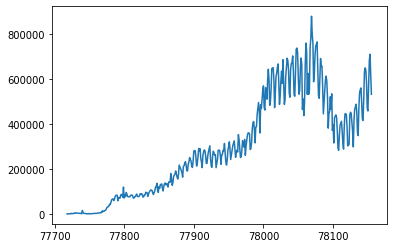

In [ ]:
world_stats.new_cases.plot()

И всех случаев

<AxesSubplot:>

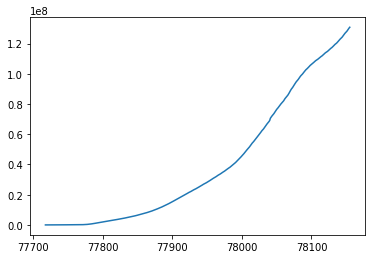

In [ ]:
world_stats.total_cases.plot()

И динамику твиттов в день  
Как мы видим интерес к короновирусу сначала нарастает, потом достигает пика и падет, иногда снова повышаясь  
Из этого можно сделать вывод, что интерес к коронавирусу тоже волнообразен  
Но не коррелирует с количеством новых случаев
Потому что пик интереса пришёлся на момент, когда случаев было не так много, но вирус был в новинку

<AxesSubplot:>

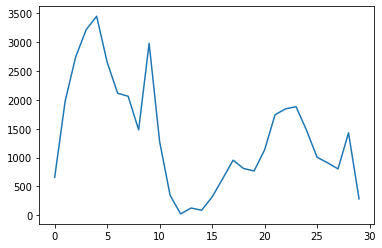

In [ ]:
count_of_twitts_per_day['count'].plot()

Исходя из теста Колмогорова-Смирнова можно наблюдать схожую картину - распределения не идентичные

In [ ]:
ks_2samp(list(world_stats.new_cases), count_of_twitts_per_day['count'])

KstestResult(statistic=0.91324200913242, pvalue=7.771561172376096e-16)

Так же интересно посмотреть распределение позитивных/негативных твиттов  
Меня несколько удивил тот факт, что позитивных твиттов о короновирусе больше, чем негативных

<AxesSubplot:>

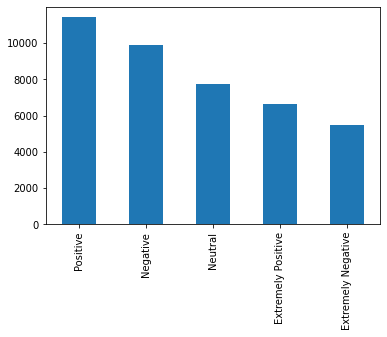

In [ ]:
twitter_data.Sentiment.value_counts().plot.bar()

Так же интересно было бы посмотреть на график динамики количества позитивных/негативных твиттов о короновирусе в зависимости от дней  

Для этого нам нужно сначала посчитать статистику по дням, а так же по эмоциональному окрасу твиттов в этот день

In [ ]:
d = dict()

for index, row in twitter_data.iterrows():
    if d.get(row.date) is None:
        d[row.date] = {"Positive":0, "Negative": 0, "Neutral":0, "Extremely Positive":0, "Extremely Negative":0}
    else:
        new_count = d[row.date].get(row.Sentiment) + 1
        d[row.date][row.Sentiment] = new_count

In [ ]:
d

{'16-03-2020': {'Positive': 186,
  'Negative': 165,
  'Neutral': 107,
  'Extremely Positive': 99,
  'Extremely Negative': 98},
 '17-03-2020': {'Positive': 507,
  'Negative': 518,
  'Neutral': 361,
  'Extremely Positive': 286,
  'Extremely Negative': 304},
 '18-03-2020': {'Positive': 740,
  'Negative': 674,
  'Neutral': 486,
  'Extremely Positive': 408,
  'Extremely Negative': 433},
 '19-03-2020': {'Positive': 863,
  'Negative': 809,
  'Neutral': 571,
  'Extremely Positive': 482,
  'Extremely Negative': 489},
 '20-03-2020': {'Positive': 910,
  'Negative': 869,
  'Neutral': 597,
  'Extremely Positive': 477,
  'Extremely Negative': 594},
 '21-03-2020': {'Positive': 710,
  'Negative': 688,
  'Neutral': 456,
  'Extremely Positive': 426,
  'Extremely Negative': 372},
 '22-03-2020': {'Positive': 588,
  'Negative': 488,
  'Neutral': 381,
  'Extremely Positive': 374,
  'Extremely Negative': 282},
 '23-03-2020': {'Positive': 614,
  'Negative': 479,
  'Neutral': 394,
  'Extremely Positive': 328,


In [ ]:
list_of_positive = []
list_of_negative = []
list_of_ex_positive = []
list_of_ex_negative = []
list_of_neutral = []

for key in d.keys():
    dict_of_sentiment = d.get(key)
    list_of_positive.append(dict_of_sentiment.get("Positive"))
    list_of_negative.append(dict_of_sentiment.get("Negative"))
    list_of_ex_positive.append(dict_of_sentiment.get("Extremely Positive"))
    list_of_ex_negative.append(dict_of_sentiment.get("Extremely Negative"))
    list_of_neutral.append(dict_of_sentiment.get("Neutral"))

У нас получилось такое распределение твиттов  
Как видно из графика распределения очень похожи  
Из этого можно сделать вывод, что эмоциональная окраска так же не зависит от количества новых случаев в день 

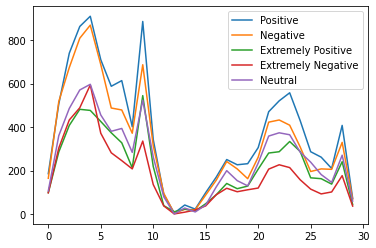

In [ ]:
plt.plot(list_of_positive)
plt.plot(list_of_negative)
plt.plot(list_of_ex_positive)
plt.plot(list_of_ex_negative)
plt.plot(list_of_neutral)
plt.legend(["Positive", "Negative", "Extremely Positive", "Extremely Negative", "Neutral"])

Проверим теорию схожости двух распределений тестом Колмогорова-Смирнова.  
Как мы видим, распределения схожи

In [ ]:
ks_2samp(list_of_positive, list_of_negative)

KstestResult(statistic=0.16666666666666666, pvalue=0.8079631540901643)

<AxesSubplot:>

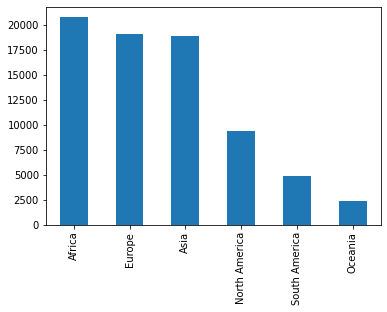

In [ ]:
coronovirus_data.continent.value_counts().plot.bar()

Теперь построим корреляционную матрицу. Возьмем только те столбцы, где мало пропущенных значений.  
Как мы видим, корреляцию можно наблюдать только между очевидными метриками, такими как количество смертей, количество заболевших, новое число заболевших.  
Вообще я расчитывала увидить корреляцию (отрицательную) между уровнем жизни и количеством смертей или между количеством смертей и количеством человек старше 70ти лет.  
Но в тоже время мы можем наблюдать корреляцию между уровнем жизни и количеством человек старше 70ти лет.

<AxesSubplot:>

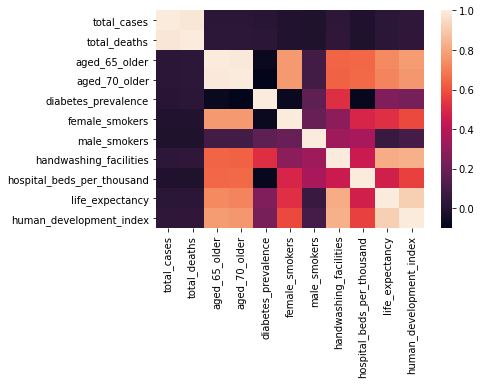

In [ ]:
corr_data = coronovirus_data[['total_cases', 'total_deaths', 'aged_65_older', 'aged_70_older', 
                              'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities',
                             'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index']]
corr = corr_data.corr()
sns.heatmap(corr)

In [ ]:
corr

,total_cases,total_deaths,aged_65_older,aged_70_older,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases,1.000000,0.984827,0.028851,0.025676,0.020765,-0.001082,-0.009486,0.030270,-0.007580,0.021034,0.036663
total_deaths,0.984827,1.000000,0.032303,0.029716,0.026848,-0.002932,-0.009586,0.039996,-0.011423,0.026235,0.041804
aged_65_older,0.028851,0.032303,1.000000,0.994797,-0.069309,0.769555,0.097088,0.640661,0.651448,0.731899,0.778848
aged_70_older,0.025676,0.029716,0.994797,1.000000,-0.099294,0.772185,0.095913,0.636651,0.652259,0.719881,0.766610
diabetes_prevalence,0.020765,0.026848,-0.069309,-0.099294,1.000000,-0.066998,0.169218,0.518711,-0.081657,0.254689,0.235504
female_smokers,-0.001082,-0.002932,0.769555,0.772185,-0.066998,1.000000,0.193669,0.291342,0.491532,0.522691,0.582294
male_smokers,-0.009486,-0.009586,0.097088,0.095913,0.169218,0.193669,1.000000,0.336485,0.359852,0.067968,0.099474
handwashing_facilities,0.030270,0.039996,0.640661,0.636651,0.518711,0.291342,0.336485,1.000000,0.447627,0.823135,0.836768
hospital_beds_per_thousand,-0.007580,-0.011423,0.651448,0.652259,-0.081657,0.491532,0.359852,0.447627,1.000000,0.469543,0.558353
life_expectancy,0.021034,0.026235,0.731899,0.719881,0.254689,0.522691,0.067968,0.823135,0.469543,1.000000,0.914282
